In [1]:
import mytry
from utils import evaluate as my_eval

In [2]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

x_train, y_train, x_test, y_test, scaler = mytry.get_traintest(
    filepath=filepath,
    pred_category='편의점', 
    y_next_quarter=True, 
    random_split=True, 
    norm='Standard', 
    pca=True
)

[train] 2017_1 : (1147, 30), accumulate : (1147, 30)
[train] 2017_2 : (1147, 30), accumulate : (2294, 30)
[train] 2017_3 : (1147, 30), accumulate : (3441, 30)
[train] 2017_4 : (1147, 30), accumulate : (4588, 30)
[train] 2018_1 : (1147, 30), accumulate : (5735, 30)
[train] 2018_2 : (1147, 30), accumulate : (6882, 30)
[train] 2018_3 : (1147, 30), accumulate : (8029, 30)
[test] 2019_1 : (1147, 30), accumulate : (1147, 30)
[test] 2019_2 : (1147, 30), accumulate : (2294, 30)
[test] 2019_3 : (1147, 30), accumulate : (3441, 30)
[test] 2018_4 : (1147, 30), accumulate : (4588, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
pca ratios [0.82 0.12 0.03 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca ratios [0.82 0.12 0.03 0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]
pca top-2


------- evaluate LGBMRegressor() -------
RMSE : 1.534217
R2 : -1.453551
33987.09072156598 4588
평균 오차 7%
최대 오차 10717%
최소 오차 0%
----------------------------


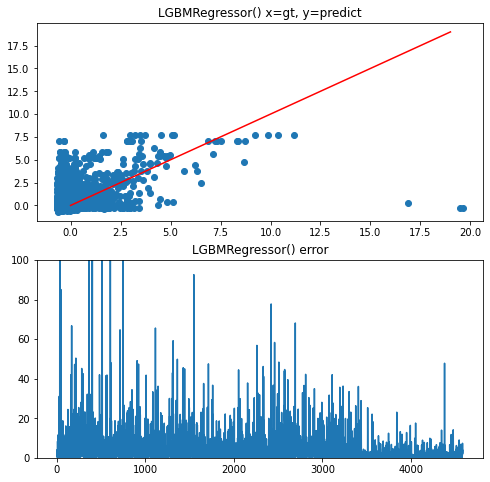

In [3]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler,
    n_hidden=-1
)

In [ ]:
model_2MLP_pca = mytry.main(
    modelname='2-MLP_pca',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler,
    n_hidden=2,
    epoch=5000
)

.

KeyboardInterrupt: 

In [ ]:
model_3MLP_pca = mytry.main(
    modelname='3-MLP_pca',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler,
    n_hidden=3,
    epoch = 5000
)

# Evaluate

In [ ]:
my_eval.eval_regression(y_test, model_LGBM_pca.predict(x_test), scaler=scaler, model_name='LGBM with PCA')

In [ ]:
my_eval.eval_regression(y_test, model_2MLP_pca.predict(x_test), scaler=scaler, model_name='2-MLP with PCA')

In [ ]:
my_eval.eval_regression(y_test, model_3MLP_pca.predict(x_test), scaler=scaler, model_name='3-MLP with PC')